In [1]:
import sys
!{sys.executable} -m pip install -U pandas numpy matplotlib seaborn numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import csv
import numpy as np

sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2.5})

Requirement already up-to-date: pandas in /opt/anaconda3/envs/PythonData/lib/python3.8/site-packages (1.3.4)
Requirement already up-to-date: numpy in /opt/anaconda3/envs/PythonData/lib/python3.8/site-packages (1.21.3)
Requirement already up-to-date: matplotlib in /opt/anaconda3/envs/PythonData/lib/python3.8/site-packages (3.4.3)
Requirement already up-to-date: seaborn in /opt/anaconda3/envs/PythonData/lib/python3.8/site-packages (0.11.2)


## Initial dataset cleaning

In [3]:
df = pd.read_csv('./data/Assessors_Parcel_Data_2020.csv', low_memory=False)

# Drop unneeded columns
properties_df = df[['APN', 'ANUMBER', 'ST_NAME', 'AUNIT',
       'ZIPCODE', 'FORMATTED_ADDRESS', 'OWNERNAME', 'TAXPAYER1', 'TAXPAYER2',
       'TAXPAYER3', 'TAXPAYER4', 'NEIGHBORHOOD', 'COMMUNITY', 'WARD',
       'ZONING', 'LANDUSE', 'PARCEL_AREA_SQFT', 'X', 'Y', 'PROPERTY_TYPE',
       'LANDVALUE', 'BUILDINGVALUE', 'TOTALVALUE', 'MULTIPLE_USES',
       'EXEMPTSTATUS', 'HOMESTEAD', 'BUILDINGUSE', 'TOTAL_UNITS', 'BEDROOMS']]
properties_df.head(3) 

# This gives us all city properties, not just residential

,APN,ANUMBER,ST_NAME,AUNIT,ZIPCODE,FORMATTED_ADDRESS,OWNERNAME,TAXPAYER1,TAXPAYER2,TAXPAYER3,...,PROPERTY_TYPE,LANDVALUE,BUILDINGVALUE,TOTALVALUE,MULTIPLE_USES,EXEMPTSTATUS,HOMESTEAD,BUILDINGUSE,TOTAL_UNITS,BEDROOMS
0,2102924340090,187,HUMBOLDT AVE N,NaN,55405-1808,187 HUMBOLDT AVE N,CARL ELLER,CARL ELLER,1035 WASHBURN AVE N,MINNEAPOLIS MN 55411,...,VACANT LAND - APARTMENT,425300,0,425300,NO,NOT EXEMPT,NON-HOMESTEADED,NaN,0.0,0
1,2202924240044,706,5TH ST N,NaN,55401-1125,706 5TH ST N,700 FIFTH LLC,700 FIFTH LLC,900 NORTH 3RD ST,MINNEAPOLIS MN 55401,...,VACANT LAND - COMMERCIAL,1192000,0,1192000,NO,NOT EXEMPT,NON-HOMESTEADED,NaN,0.0,0
2,3602924430092,2904,28TH AVE S,NaN,55406-1516,2904 28TH AVE S,MINNEHAHA CROSSING LLC,MINNEHAHA CROSSING LLC,1625 ENERGY PARK DR #100,ST PAUL MN 55108,...,COMMERCIAL,1475500,6324500,7800000,NO,NOT EXEMPT,NON-HOMESTEADED,NaN,0.0,0


In [4]:
# Get just residential homes - check if property_type column includes the following
prop_types = ['RESIDENTIAL', 'CONDOMINIUM', 'DOUBLE BUNGALOW', 'APARTMENT', 
             'COOPERATIVE', 'TOWNHOUSE', 'TRIPLEX', 'RESIDENTIAL MISC', 'RESIDENTIAL LAKE SHORE']

residential = properties_df[properties_df['PROPERTY_TYPE'].isin(prop_types)]

In [5]:
# Remove city-owned properties (though you might want to leave this in!)
# City properties = where taxpayer is city-related
city_owners = ['MPLS PUBLIC HOUSING AUTH', 'CITY OF MINNEAPOLIS', 'MINNEAPOLIS PUBLIC HSG AUTH', 
               'MPLS PUBLIC HSG AUTHORITY', 'MPLS PUBLIC HSG AUTH', 'MPLS PARK & RECREATION BOARD', 
               'MPLS PUBLIC HSG ATHY', 'HENNEPIN FORFEITED LAND', 'MINNEAPOLIS PUBLIC HSNG AUTH'
               'HENN CTY HSG & RDVLPT ATHY', 'HENN CO HSG & REDEV AUTH', 'MPLS PARK BOARD', 'HENNEPIN COUNTY',
               'HENNEPIN FORFEITED LAND', 'MPLS PUBLIC HSG AUTH/MPLS', 'MPLS PUB HSG AUTH/CITY MPLS', 
               'MPLS PUBLIC HSG AUTH', 'MPLS PUBLIC HOUSING', 'MPLS PUBLIC HOUSING AUTHORTY', 
               'MPLS PUB HSNG AUTH FOR MPLS', 'CITY OF MPLS PK BD', 'CITY OF MPLS PARK BOARD',
               'MINNEAPOLIS PUBLIC HSNG AUTH']

city_owned = residential[residential['OWNERNAME'].isin(city_owners)]

In [6]:
# Segment out corporate vs "mom and pop" landlords

# "Mom and pop" landlords = "Homesteaded" (owners live on the property) where units > 1
mom_pop = residential[(residential['TOTAL_UNITS'] > 1) & (residential['HOMESTEAD'] == 'HOMESTEADED')]

# Corporate owners = residential properties that are not city owned nor homesteaded
corporate = residential[~residential['OWNERNAME'].isin(city_owners)]
corporate = corporate[corporate['HOMESTEAD'] == 'NON-HOMESTEADED']

## Data cleaning magic + Open Refine
Next, I complete other pandas-based data cleaning steps, then import the data to Open Refine to further clean the data and associate properties with landlords. I'm not going to share this process publicly, because I'd hate to help shady landlords find ways to better hide their ownership of properties. If you're a housing advocate or renter who wants to learn more, [email me](mailto:hello@stacykonkiel.org).

Once data cleaning is complete, I export the landlord data to a `cleaned_corporate.csv` file.

## Data analysis

In [7]:
# Reimport the cleaned data
corporates = pd.read_csv('./data/cleaned_corporate.csv')
corporates.head()

,APN,ANUMBER,ST_NAME,AUNIT,ZIPCODE,FORMATTED_ADDRESS,OWNERNAME,TAXPAYER1,TAXPAYER2,TAXPAYER3,...,LANDVALUE,BUILDINGVALUE,TOTALVALUE,MULTIPLE_USES,EXEMPTSTATUS,HOMESTEAD,BUILDINGUSE,TOTAL_UNITS,BEDROOMS,TAXPAYER_ADDRESS_STREET
0,102824230128,3304,19TH AVE S,NaN,55407-2449,3304 19TH AVE S,DOUGLAS R RYAN TRUSTEE,DOUGLAS RYAN,700 285TH AVE N W,ISANTI MN 55040,...,36300,181700,218000,NO,NOT EXEMPT,NON-HOMESTEADED,DOUBLE BUNGALOW,2.0,2,700 285TH AVE N W
1,102824230129,3308,19TH AVE S,NaN,55407-2449,3308 19TH AVE S,TC COMM HOUSING SERVICES LLC,TC COMM HOUSING SERVCS LLC,9705 45TH AVE N 41813,MINNEAPOLIS MN 55441,...,75100,399900,475000,NO,NOT EXEMPT,NON-HOMESTEADED,APARTMENT 4 OR 5 UNIT,4.0,0,9705 45TH AVE N 41813
2,102824230134,3319,LONGFELLOW AVE,NaN,55407-2341,3319 LONGFELLOW AVE,RONALD A TANN JR,RONALD A TANN JR,4049 LAZY STREAM CT,CHESTER VA 23831,...,12800,262200,275000,NO,NOT EXEMPT,NON-HOMESTEADED,2 FAM. CONV. SGL. DWLG.,2.0,4,4049 LAZY STREAM CT
3,102824230137,3309,LONGFELLOW AVE,NaN,55407-2341,3309 LONGFELLOW AVE,SAI ZHEN YANG,SAI ZHEN YANG,159 WATERFORD CIR,WINONA MN 55987,...,37200,211800,249000,NO,NOT EXEMPT,NON-HOMESTEADED,SINGLE FAM. DWLG.,1.0,3,159 WATERFORD CIR
4,102824230145,3320,LONGFELLOW AVE,NaN,55407-2354,3320 LONGFELLOW AVE,LONNY G & KATHRYN M DOUB,LONNY G DOUB/KATHRYN M DOUB,3750 CEDAR AVE,MINNEAPOLIS MN 55407,...,225200,2696800,2922000,NO,NOT EXEMPT,NON-HOMESTEADED,APARTMENT 6+ UNIT,22.0,0,3750 CEDAR AVE


In [9]:
# Reimport all residential property data (if needed)
residential_types = ['RESIDENTIAL', 'CONDOMINIUM', 'DOUBLE BUNGALOW',
                    'APARTMENT', 'TRIPLEX', 'COOPERATIVE',
                    'TOWNHOUSE', 'RESIDENTIAL MISC', 'RESIDENTIAL LAKE SHORE']

all_properties = pd.read_csv('./data/Assessors_Parcel_Data_2020.csv', low_memory=False)
all_properties = all_properties[all_properties['PROPERTY_TYPE'].isin(residential_types)]

Let's get a quick look at the data.

In [10]:
corporates.dtypes

APN                          int64
ANUMBER                     object
ST_NAME                     object
AUNIT                       object
ZIPCODE                     object
FORMATTED_ADDRESS           object
OWNERNAME                   object
TAXPAYER1                   object
TAXPAYER2                   object
TAXPAYER3                   object
TAXPAYER4                   object
NEIGHBORHOOD                object
COMMUNITY                   object
WARD                       float64
ZONING                      object
LANDUSE                     object
PARCEL_AREA_SQFT           float64
X                          float64
Y                          float64
PROPERTY_TYPE               object
LANDVALUE                    int64
BUILDINGVALUE                int64
TOTALVALUE                   int64
MULTIPLE_USES               object
EXEMPTSTATUS                object
HOMESTEAD                   object
BUILDINGUSE                 object
TOTAL_UNITS                float64
BEDROOMS            

In [11]:
# sample record
corporates.loc[3]

APN                                     102824230137
ANUMBER                                         3309
ST_NAME                               LONGFELLOW AVE
AUNIT                                            NaN
ZIPCODE                                   55407-2341
FORMATTED_ADDRESS                3309 LONGFELLOW AVE
OWNERNAME                              SAI ZHEN YANG
TAXPAYER1                              SAI ZHEN YANG
TAXPAYER2                          159 WATERFORD CIR
TAXPAYER3                            WINONA MN 55987
TAXPAYER4                                        NaN
NEIGHBORHOOD                                CORCORAN
COMMUNITY                                 POWDERHORN
WARD                                             9.0
ZONING                                           R2B
LANDUSE                    SINGLE-FAMILY DETACHED DW
PARCEL_AREA_SQFT                              6255.0
X                                      535630.838646
Y                                      155228.

## Top rental property owners in Minneapolis

In [12]:
top_corporates = corporates['OWNERNAME'].value_counts()[:20]
top_corporates = pd.DataFrame(top_corporates)
top_corporates['% city rentals'] = (top_corporates['OWNERNAME'] / corporates.shape[0]) * 100
top_corporates

,OWNERNAME,% city rentals
FYR SFR BORROWER LLC (FRONT YARD RESIDENTIAL CORP),227,0.732707
J & M HOMES LLC,139,0.448662
CARPATHIAN CAPITAL MANAGEMENT,114,0.367967
JAMES EISCHENS,105,0.338917
DANIEL GELB,98,0.316323
HAAG PROPERTIES LLC,91,0.293728
DAVID A & BARBARA HORNIG,84,0.271134
CHAD/MATT KRAFT,79,0.254995
KEN WELCH III/ASSERTIVE MPLS PROPS LLC,79,0.254995
TODD HANSEN/COPENHAGEN ENTERPRISES,78,0.251767


In [13]:
df = (corporates.groupby('OWNERNAME')['TOTALVALUE'] 
        .agg(['count','sum','mean','median'])
        .sort_values(by='count',ascending=False)[:20])
df['clean_mean'] = df['mean'].round()
df.drop(axis=1,labels=['mean'],inplace=True)
df.rename(columns={'clean_mean': 'mean'},inplace=True)
df

,count,sum,median,mean
OWNERNAME,,,,
FYR SFR BORROWER LLC (FRONT YARD RESIDENTIAL CORP),227,36093000,154500.0,159000.0
J & M HOMES LLC,139,26949500,174500.0,193881.0
CARPATHIAN CAPITAL MANAGEMENT,114,16473000,127250.0,144500.0
JAMES EISCHENS,105,60607900,307000.0,577218.0
DANIEL GELB,98,13867000,128250.0,141500.0
HAAG PROPERTIES LLC,91,9182100,98500.0,100902.0
DAVID A & BARBARA HORNIG,84,244431000,2406500.0,2909893.0
KEN WELCH III/ASSERTIVE MPLS PROPS LLC,79,10634000,135000.0,134608.0
CHAD/MATT KRAFT,79,45209500,367000.0,572272.0


In [14]:
df['count'].sum() # How many rental properties these top 20 landlords own

1670

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'FYR SFR BORROWER LLC (FRONT YARD RESIDENTIAL CORP)'),
  Text(0, 1, 'J & M HOMES LLC'),
  Text(0, 2, 'CARPATHIAN CAPITAL MANAGEMENT'),
  Text(0, 3, 'JAMES EISCHENS'),
  Text(0, 4, 'DANIEL GELB'),
  Text(0, 5, 'HAAG PROPERTIES LLC'),
  Text(0, 6, 'DAVID A & BARBARA HORNIG'),
  Text(0, 7, 'CHAD/MATT KRAFT'),
  Text(0, 8, 'KEN WELCH III/ASSERTIVE MPLS PROPS LLC'),
  Text(0, 9, 'TODD HANSEN/COPENHAGEN ENTERPRISES'),
  Text(0, 10, 'PROJECT FOR PRIDE IN LIVING'),
  Text(0, 11, 'AEON'),
  Text(0, 12, 'INVITATION HOMES INC'),
  Text(0, 13, 'KLP REAL ESTATE LLC'),
  Text(0, 14, 'BRIAN R HARA'),
  Text(0, 15, 'TRELLIS CO/COMMUNITY HOUSING DEVELOPMENT CORPORATION'),
  Text(0, 16, 'THOMAS WOLFE/REALTY PROS'),
  Text(0, 17, 'ROSS HERMAN/HERMAN REALTY INC'),
  Text(0, 18, 'COMMON BOND COMMUNITIES'),
  Text(0, 19, 'TIM HARMSEN')])

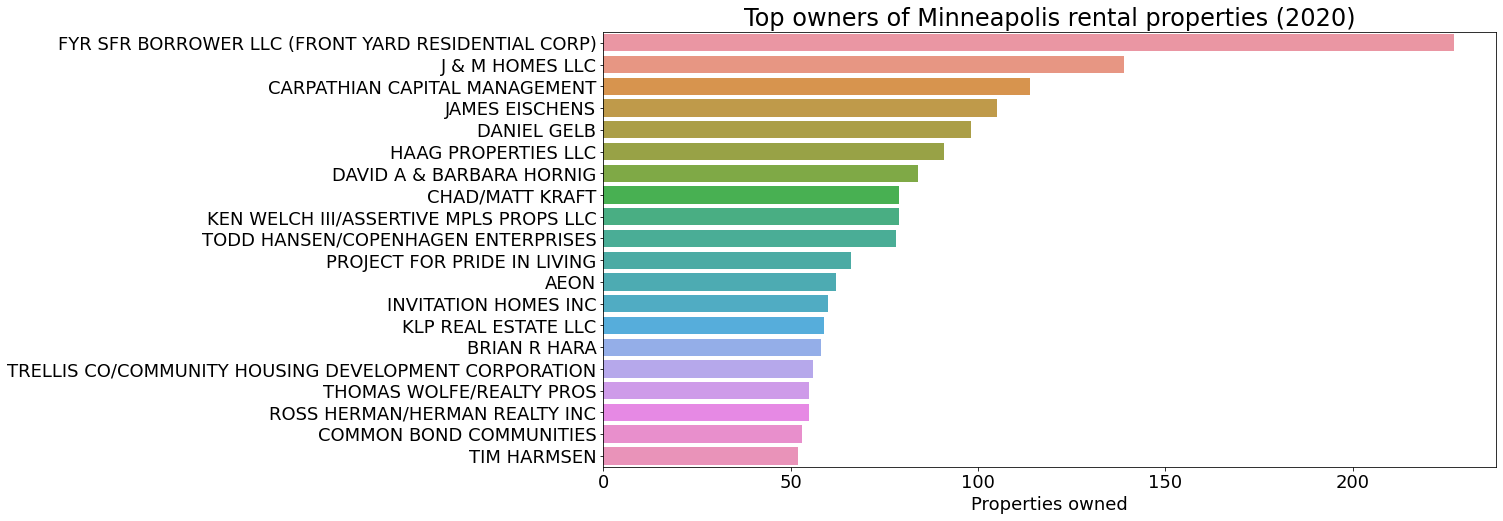

In [15]:
plt.figure(figsize = (16,8))

sns.barplot(x=top_corporates['OWNERNAME'], y=top_corporates.index)
plt.title('Top owners of Minneapolis rental properties (2020)', fontsize=24)
plt.xlabel('Properties owned',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

## Single family homes used as rental properties
* Number/% of properties owned by corporate owners (total)
* Number/% of properties owned by corporate owners (by neighborhood)

In [16]:
# Segment out landlord/corporate vs all single family homes
sfam_types = ['SINGLE FAM. DWLG.', 'SGL. DWLG. W/TUCK UNDER', 'SPLIT LEVEL SNG. DWLG.', 'SPLIT ENTRY SGL. DWLG.']

corporate_sfam = corporates[corporates['BUILDINGUSE'].isin(sfam_types)] # 13573 properties
all_properties_sfam = all_properties[all_properties['BUILDINGUSE'].isin(sfam_types)] # 74689 properties

In [17]:
# Segment out mom and pop single family home landlords
mom_pop_sfam = all_properties_sfam[(all_properties_sfam['TOTAL_UNITS'] > 1) & (all_properties_sfam['HOMESTEAD'] == 'HOMESTEADED')]
mom_pop_sfam.shape[0] # Only 39 sfam properties owned by true mom and pop

39

In [18]:
# Proportion of single family properties that are rentals
pct_sfam_rented = round((corporate_sfam.shape[0] / all_properties_sfam.shape[0]) * 100,1)
pct_sfam_rented

18.2

Text(0.5, 1.0, 'Ownership of single-family Minneapolis properties (2020)')

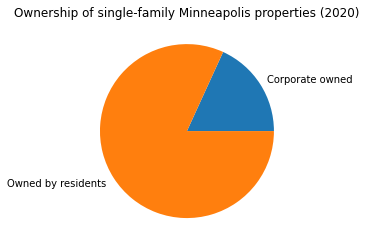

In [19]:
plt.pie([corporate_sfam.shape[0],all_properties_sfam.shape[0] - corporate_sfam.shape[0]],
       labels=['Corporate owned', 'Owned by residents'])
plt.title("Ownership of single-family Minneapolis properties (2020)")

## Differences in single family rentals by neighborhood

In [20]:
# Get counts of rental vs all sfam properties by neighborhood
neighborhood_sfam_corporate = pd.DataFrame(corporate_sfam.groupby('NEIGHBORHOOD')['APN'].count())
neighborhood_sfam_all = pd.DataFrame(all_properties_sfam.groupby('NEIGHBORHOOD')['APN'].count())

# Clean up the tables
neighborhood_sfam_corporate.rename(columns={'APN': 'Houses'}, inplace=True)
neighborhood_sfam_all.rename(columns={'APN': 'Houses'}, inplace=True)
neighborhood_sfam_all['neighborhood'] = neighborhood_sfam_all.index
neighborhood_sfam_corporate['neighborhood'] = neighborhood_sfam_corporate.index

# Merge into a neighborhood tables
sfams_by_neighborhood = neighborhood_sfam_corporate.merge(neighborhood_sfam_all, on='neighborhood', how='outer', 
                                 suffixes=['_corporate', '_all'])
sfams_by_neighborhood['pct_rentals'] = round((sfams_by_neighborhood['Houses_corporate'] / sfams_by_neighborhood['Houses_all']) * 100,1)
sfams_by_neighborhood.head()

,Houses_corporate,neighborhood,Houses_all,pct_rentals
0,233,ARMATAGE,1863,12.5
1,205,AUDUBON PARK,1651,12.4
2,135,BANCROFT,1022,13.2
3,58,BELTRAMI,203,28.6
4,45,BOTTINEAU,206,21.8


In [21]:
# Get top and bottom 5 neighborhoods by %age of rentals
nhood_lowest = sfams_by_neighborhood.sort_values(by='pct_rentals')[:5]
nhood_highest = sfams_by_neighborhood[sfams_by_neighborhood['Houses_all'] >= 10].sort_values(by='pct_rentals', ascending=False)[:5]

In [22]:
nhood_lowest

,Houses_corporate,neighborhood,Houses_all,pct_rentals
57,51,PAGE,636,8.0
53,1,NICOLLET IS/EAST BANK,12,8.3
26,116,HALE,1192,9.7
16,199,DIAMOND LAKE,2005,9.9
56,159,NORTHROP,1592,10.0


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'PAGE'),
  Text(0, 1, 'NICOLLET IS/EAST BANK'),
  Text(0, 2, 'HALE'),
  Text(0, 3, 'DIAMOND LAKE'),
  Text(0, 4, 'NORTHROP')])

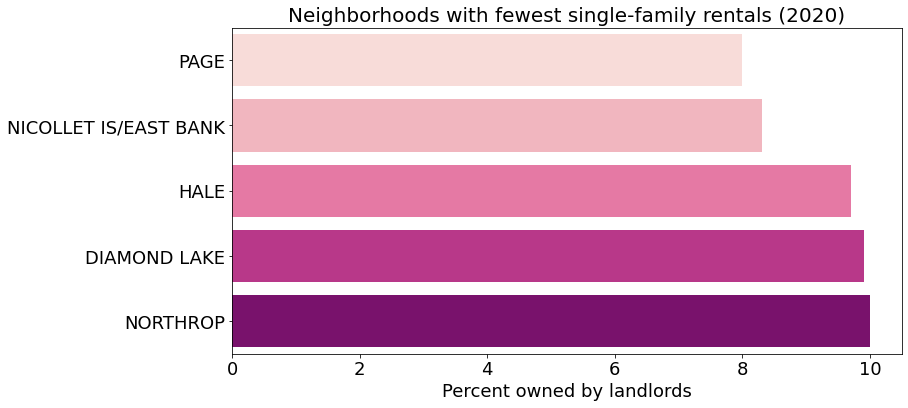

In [23]:
plt.figure(figsize = (12,6))

sns.barplot(x=nhood_lowest['pct_rentals'], y=nhood_lowest['neighborhood'],palette='RdPu')
plt.title('Neighborhoods with fewest single-family rentals (2020)', fontsize=20)
plt.xlabel('Percent owned by landlords',fontsize=18)
plt.ylabel('')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [24]:
# Median house price in low-rental neighborhoods
all_properties[all_properties['NEIGHBORHOOD'].isin(nhood_lowest['neighborhood'])]['TOTALVALUE'].median()

350500.0

In [25]:
# Median house price in high-rental neighborhoods
all_properties[all_properties['NEIGHBORHOOD'].isin(nhood_highest['neighborhood'])]['TOTALVALUE'].median()

175500.0

Text(0.5, 0, 'Percent owned by landlords')

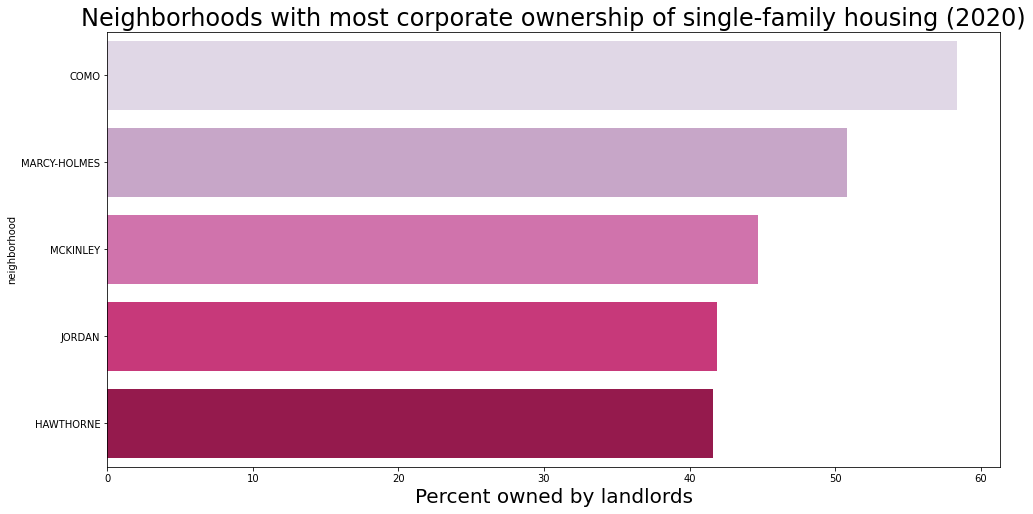

In [26]:
plt.figure(figsize = (16,8))

sns.barplot(x=nhood_highest['pct_rentals'], y=nhood_highest['neighborhood'], palette='PuRd')

plt.title('Neighborhoods with most corporate ownership of single-family housing (2020)', fontsize=24)
plt.xlabel('Percent owned by landlords',fontsize=20)

## Number of distinct corporations to file taxes used by single owners
* How many owners use more than one entities (other people, LLCs, etc) to register their properties?

In [27]:
top20_alias_users = (pd.DataFrame(corporates
              .groupby('OWNERNAME')['TAXPAYER1']
              .nunique()
              .sort_values(ascending=False)[:20]))

aliases = top20_alias_users.sort_values(by='TAXPAYER1',ascending=False)
aliases

,TAXPAYER1
OWNERNAME,
DAVID A & BARBARA HORNIG,53
CHAD/MATT KRAFT,37
FIRST SERVICE RESIDENTIAL,34
2615 PARK AVE ASSN (CO-OP),31
JAMES EISCHENS,30
JAMES R RUBIN/MINT PROPERTIES,27
INNOVATIVE PROPERTIES LLC,26
PROJECT FOR PRIDE IN LIVING,25
KLEINMAN REALTY CO.,24


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'DAVID A & BARBARA HORNIG'),
  Text(0, 1, 'CHAD/MATT KRAFT'),
  Text(0, 2, 'FIRST SERVICE RESIDENTIAL'),
  Text(0, 3, '2615 PARK AVE ASSN (CO-OP)'),
  Text(0, 4, 'JAMES EISCHENS'),
  Text(0, 5, 'JAMES R RUBIN/MINT PROPERTIES'),
  Text(0, 6, 'INNOVATIVE PROPERTIES LLC'),
  Text(0, 7, 'PROJECT FOR PRIDE IN LIVING'),
  Text(0, 8, 'KLEINMAN REALTY CO.'),
  Text(0, 9, 'WALKER RESIDENCE INC'),
  Text(0, 10, 'TRELLIS CO/COMMUNITY HOUSING DEVELOPMENT CORPORATION'),
  Text(0, 11, 'FRANKLIN STUDENT HSG CO-OP'),
  Text(0, 12, 'ALAN J SPAULDING/AT HOME APARTMENTS'),
  Text(0, 13, 'NORTH BAY COMPANIES'),
  Text(0, 14, 'COMMON BOND COMMUNITIES'),
  Text(0, 15, 'TIM HARMSEN'),
  Text(0, 16, 'CLARK A GASSEN'),
  Text(0, 17, 'GEORGE N & CATHERINE W PUZAK'),
  Text(0, 18, 'BECKETWOOD CO-OP'),
  Text(0, 19, 'ROBERT M ANDERSON TRUSTEE')])

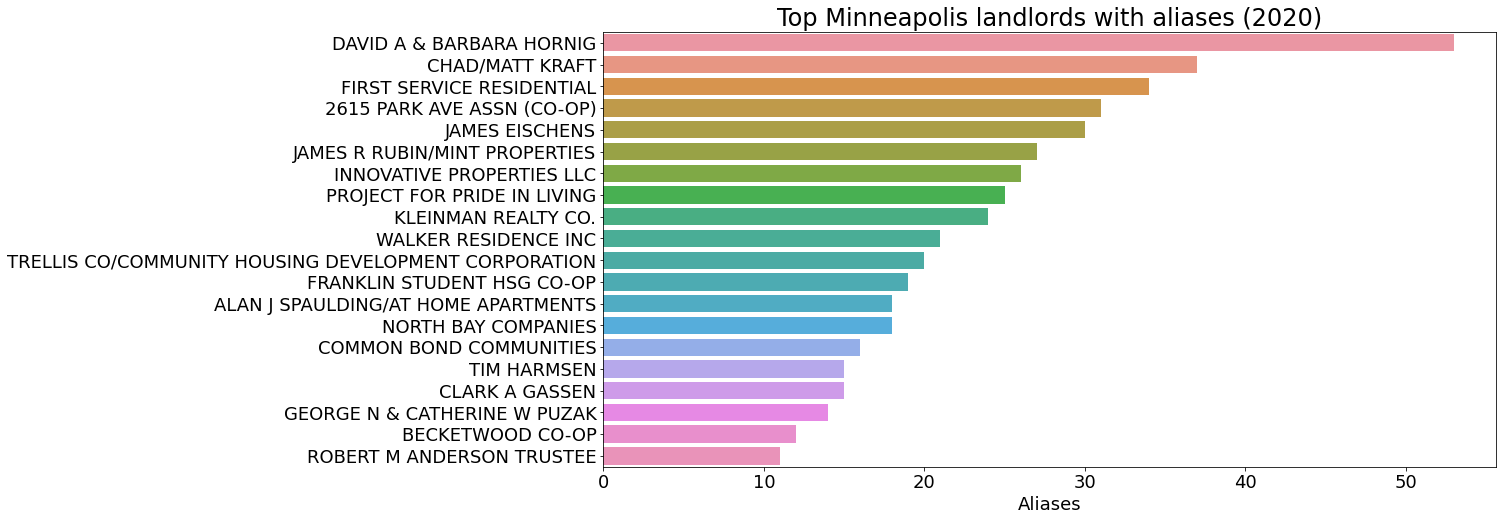

In [28]:
plt.figure(figsize = (16,8))

sns.barplot(x=aliases['TAXPAYER1'], y=aliases.index)
plt.title('Top Minneapolis landlords with aliases (2020)', fontsize=24)
plt.xlabel('Aliases',fontsize=18)
plt.ylabel('')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [29]:
alias_users = pd.DataFrame(corporates.groupby('OWNERNAME')['TAXPAYER1'].nunique()).sort_values(by="TAXPAYER1", ascending=False)

In [30]:
alias_users = alias_users[(alias_users['TAXPAYER1'] > 1) & alias_users.index]
alias_users.head()

,TAXPAYER1
OWNERNAME,
DAVID A & BARBARA HORNIG,53
CHAD/MATT KRAFT,37
FIRST SERVICE RESIDENTIAL,34
2615 PARK AVE ASSN (CO-OP),31
JAMES EISCHENS,30


In [31]:
alias_users.sum() # Total number of aliases used by landlords with more than one alias

TAXPAYER1    2961
dtype: int64

In [32]:
alias_users.shape[0] # Total number of landlords using more than one alias

852

In [33]:
# Example of a landlord with many aliases
corporates[corporates['OWNERNAME'] == 'CHAD/MATT KRAFT'][['OWNERNAME','TAXPAYER1']]['TAXPAYER1'].value_counts()

GOPHER INVESTMENT LLC           23
COMO INVSTMNT PROPERTIES LLC     8
HENN FIN ACQUISTIONS II LLC      5
1110/1114 13TH AVE SE LLC        3
K & R STRATEGIC INVTMT LLC       3
1202 COMO SE LLC                 3
GOGOPHER RENTALS LLC             2
1607 COMO AVE SE LLC             2
1424 & 1428 6TH ST SE LLC        2
CLUSTER DINKYTOWN LLC            1
1105 6TH ST SE LLC               1
915 6TH ST SE LLC                1
2624 ESSEX PARTNERS LLC          1
PROSPECT MARCY PROPERTIES        1
1107 8TH ST SE LLC               1
1120 4TH ST SE LLC               1
GRAY JAX INVESTMENTS LLC         1
501 8TH ST SE LLC                1
528 14TH AVE SE LLC              1
629 6TH ST SE LLC                1
518 12TH AVE SE LLC              1
NORTHSTAR GA LLC ET AL           1
1027 13TH AVE SE LLC             1
813 12TH AVE SE LLC              1
412 4TH ST SE LLC                1
1018 13TH AVE SE LLC             1
1424-1428 6TH SE LLC             1
1025 15TH AVE SE LLC             1
867 22ND AVE S E LLC

## How many housing units are owned by landlords vs owner-occupants/residents?

In [34]:
resident_owned = all_properties[all_properties['HOMESTEAD'] == 'HOMESTEADED']
resident_units = resident_owned['TOTAL_UNITS'].sum()
print(resident_units)

82798.0


In [35]:
corporate_units = corporates['TOTAL_UNITS'].sum()
print(corporate_units)

114203.0


In [36]:
all_units = resident_units + corporate_units

In [37]:
print(f'Proportion of Minneapolis housing units owned by residents: {round((resident_units / all_units)*100)}%.')
print(f'Proportion of Minneapolis housing units owned by landlords: {round((corporate_units / all_units)*100)}%.')

Proportion of Minneapolis housing units owned by residents: 42%.
Proportion of Minneapolis housing units owned by landlords: 58%.


## How many rental units are true “mom and pop” (owned by someone who lives in same building)?

In [38]:
mom_pop = all_properties[(all_properties['TOTAL_UNITS'] > 1) & (all_properties['HOMESTEAD'] == 'HOMESTEADED')]

In [39]:
mom_pop_properties = mom_pop.shape[0]
print(mom_pop_properties)

4790


In [40]:
# Assuming that each property has one unit occupied by owner, remainder is add'l units
mom_units = mom_pop['TOTAL_UNITS'].sum() - mom_pop_properties
mom_units

5389.0

In [41]:
round(mom_units / all_units * 100,1) # % of residential units rented by mom and pop landlords

2.7

## How much real estate is public housing?

In [42]:
city_owners = ['MPLS PUBLIC HOUSING AUTH', 'CITY OF MINNEAPOLIS', 'MINNEAPOLIS PUBLIC HSG AUTH', 
               'MPLS PUBLIC HSG AUTHORITY', 'MPLS PUBLIC HSG AUTH', 'MPLS PARK & RECREATION BOARD', 
               'MPLS PUBLIC HSG ATHY', 'HENNEPIN FORFEITED LAND', 'MINNEAPOLIS PUBLIC HSNG AUTH'
               'HENN CTY HSG & RDVLPT ATHY', 'HENN CO HSG & REDEV AUTH', 'MPLS PARK BOARD', 'HENNEPIN COUNTY',
               'HENNEPIN FORFEITED LAND', 'MPLS PUBLIC HSG AUTH/MPLS', 'MPLS PUB HSG AUTH/CITY MPLS', 
               'MPLS PUBLIC HSG AUTH', 'MPLS PUBLIC HOUSING', 'MPLS PUBLIC HOUSING AUTHORTY', 
               'MPLS PUB HSNG AUTH FOR MPLS', 'CITY OF MPLS PK BD', 'CITY OF MPLS PARK BOARD',
               'MINNEAPOLIS PUBLIC HSNG AUTH']

city_owned = all_properties[all_properties['OWNERNAME'].isin(city_owners)]

city_owned.shape[0] # Number of city owned properties

859

In [43]:
city_units = city_owned['TOTAL_UNITS'].sum()
print(city_units) # Number of city owned rental units

5700.0


In [44]:
# % of rental units that are city owned
round(city_units / all_units * 100,1)

2.9

## How many rental units are owned by “small time” landlords (<4 properties)?

In [45]:
owner_props = corporates.groupby('OWNERNAME')['APN'].count() # APN is unique property id 

In [46]:
owner_props[owner_props < 4].sum() # Properties with "big time" landlords (4+ properties)

22828

In [47]:
owner_props[owner_props > 3].sum() # Properties with "small time" landlords (3 or fewer properties)

8152

### How many of these rental units are single family houses? What kind of landlords are they owned by?

In [48]:
c_sfam_properties = corporate_sfam.groupby('OWNERNAME')['APN'].count()

In [49]:
c_sfam_properties.sum() # Total number of single-family rental properties

13572

In [50]:
c_sfam_properties[c_sfam_properties < 4].sum() # Properties with "small time" landlords (3 or fewer properties)

11027

In [51]:
c_sfam_properties[c_sfam_properties > 3].sum() # Properties with "big time" landlords (4+ properties)

2545

## How much real estate wealth for residential units is owned by people who use it for profit?

In [52]:
# Owned by landlords
c_value = corporates['TOTALVALUE'].sum()
c_value_bil = c_value / 1000000000
print(c_value_bil) # Billion

19.5167768


In [53]:
# All residential properties
all_value = all_properties['TOTALVALUE'].sum()
all_value_bil = all_value / 1000000000
print(all_value_bil) # Billion

45.6285472


In [54]:
# Resident owned
r_value = resident_owned['TOTALVALUE'].sum()
r_value_bil = r_value / 1000000000
print(r_value_bil) # Billion

25.963505


In [55]:
# City owned
city_value = city_owned['TOTALVALUE'].sum()
city_value_bil = city_value / 1000000000
print(city_value_bil) # Billion

0.1514154


<AxesSubplot:>

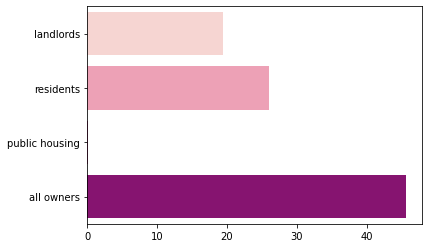

In [56]:
labels = ['landlords', 'residents', 'public housing','all owners']
values = [c_value_bil,r_value_bil,city_value_bil,all_value_bil]

sns.barplot(x=values,y=labels, palette='RdPu')

In [57]:
# Check that the values add up to total residential real estate value
c_value + r_value + city_value

45631697200

## Export corporate owners data (cleaned)

In [58]:
cols = ['APN', 'FORMATTED_ADDRESS', 'OWNERNAME', 'TAXPAYER1',
       'NEIGHBORHOOD', 'COMMUNITY', 'PROPERTY_TYPE', 'TOTALVALUE',
       'HOMESTEAD', 'TOTAL_UNITS'] 

corp_cleaned = corporates[cols]
corp_cleaned.head()

,APN,FORMATTED_ADDRESS,OWNERNAME,TAXPAYER1,NEIGHBORHOOD,COMMUNITY,PROPERTY_TYPE,TOTALVALUE,HOMESTEAD,TOTAL_UNITS
0,102824230128,3304 19TH AVE S,DOUGLAS R RYAN TRUSTEE,DOUGLAS RYAN,CORCORAN,POWDERHORN,DOUBLE BUNGALOW,218000,NON-HOMESTEADED,2.0
1,102824230129,3308 19TH AVE S,TC COMM HOUSING SERVICES LLC,TC COMM HOUSING SERVCS LLC,CORCORAN,POWDERHORN,APARTMENT,475000,NON-HOMESTEADED,4.0
2,102824230134,3319 LONGFELLOW AVE,RONALD A TANN JR,RONALD A TANN JR,CORCORAN,POWDERHORN,DOUBLE BUNGALOW,275000,NON-HOMESTEADED,2.0
3,102824230137,3309 LONGFELLOW AVE,SAI ZHEN YANG,SAI ZHEN YANG,CORCORAN,POWDERHORN,RESIDENTIAL,249000,NON-HOMESTEADED,1.0
4,102824230145,3320 LONGFELLOW AVE,LONNY G & KATHRYN M DOUB,LONNY G DOUB/KATHRYN M DOUB,CORCORAN,POWDERHORN,APARTMENT,2922000,NON-HOMESTEADED,22.0


In [ ]:
corp_cleaned.to_csv('./data/final_landlords.csv',index=False)